In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('./data/gerd.csv',index_col=0)

In [3]:
df.columns

Index(['Name', 'WMT', 'RE', 'TRE', 'PUT', 'PST', 'PTT', 'TRAC', 'LRE', 'DMS',
       'RE-L-Ac', 'RE-L-Wa', 'RE-L-Al', 'RE-L-Ak', 'RE-M-Ac', 'RE-M-Wa',
       'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak',
       'gender', 'age', 'birthday', '检查时间', '主诉', 'CFV', 'LESP', 'LES-IRP',
       'DL', 'LES上缘位置cm', 'LES下缘位置cm', 'DCI', 'LES-length', 'LES位置(距鼻孔)cm',
       'IBP', 'PIP', 'HH', 'PC', 'SC', 'UES静息压mmHg', 'UES残余压mmHg', '大缺损收缩(次)',
       'UES上缘位置cm', '小缺损收缩(次)', 'UES下缘位置cm', 'IEC', 'UES长度cm', 'MRS-DCI',
       'UES位置(距鼻孔)cm', '诊断结果', 'label'],
      dtype='object')

In [4]:
X = df.drop(columns=['Name','gender', 'LES上缘位置cm', 'LES位置(距鼻孔)cm','LES下缘位置cm','UES静息压mmHg', 'UES残余压mmHg', '大缺损收缩(次)',
       'UES上缘位置cm', '小缺损收缩(次)', 'UES下缘位置cm','UES长度cm','UES位置(距鼻孔)cm','age', 'birthday', '检查时间', '主诉','诊断结果','PIP','label'])
y = df['label']

In [5]:
X.replace('YES',1,inplace=True)
X.replace('NO',0,inplace=True)
X.replace('1.#J',1.0,inplace=True)
X.replace('--',0,inplace=True)
X.replace('-',0,inplace=True)

In [6]:
'''数据集划分'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 123, stratify = 
                                                 y)

In [7]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# estimator = SVR(kernel="linear")
estimator = RandomForestClassifier(oob_score=True,random_state=123,bootstrap=True)

# estimator = grid_rf.best_estimator_
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)
selector.support_
selector.ranking_

array([ 1,  7,  1,  8, 16, 14,  1,  3,  1, 17,  5, 19,  2, 11,  4, 18,  6,
        9, 10, 15, 12,  1,  1,  1,  1,  1,  1,  1,  1, 13, 21, 20,  1])

In [8]:
col = X.columns[selector.support_]

In [9]:
col

Index(['WMT', 'TRE', 'TRAC', 'DMS', 'CFV', 'LESP', 'LES-IRP', 'DL', 'DCI',
       'LES-length', 'IBP', 'HH', 'MRS-DCI'],
      dtype='object')

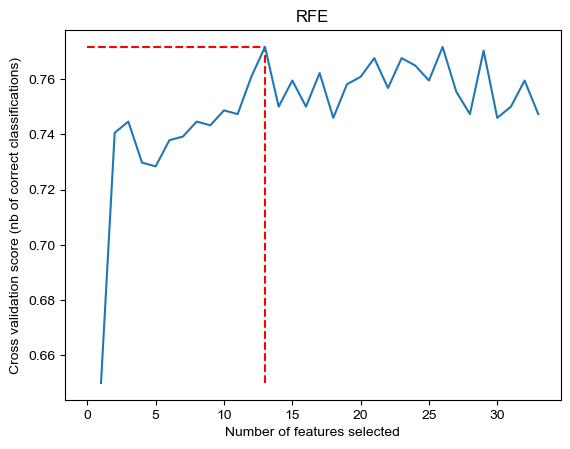

In [10]:
plt.figure()
plt.title('RFE')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.rcParams['font.sans-serif'] = 'Arial'
plt.plot([0, 13], [0.7716216216216216, 0.7716216216216216], c='r', linestyle='--')
plt.plot([13, 13], [0.65, 0.7716216216216216], c='r', linestyle='--')
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
plt.show()

In [10]:
selector.cv_results_['mean_test_score'].max()

0.7716216216216216

In [11]:
X = X.loc[:,selector.support_]

In [12]:
X

,WMT,TRE,TRAC,DMS,CFV,LESP,LES-IRP,DL,DCI,LES-length,IBP,HH,MRS-DCI
0,89969,132,8,1.8,2.29,8.2,7.6,8.73,2035.8,2.36,17.2,0,0.00
1,78654,1251,156,7.2,4.88,3.4,0.6,7.46,521.9,2.87,13.5,1,1.28
2,78654,1251,156,42.7,4.88,3.4,0.6,7.46,521.9,2.87,13.5,1,1.28
3,82849,8920,55,7.2,4.88,3.4,0.6,7.46,521.9,2.87,13.5,1,1.28
4,82849,8920,55,42.7,4.88,3.4,0.6,7.46,521.9,2.87,13.5,1,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,80226,4168,80,19.6,1.67,-5.2,-7.9,10.73,3669.0,2.55,31.5,0,0.00
921,81258,1459,52,5.6,71.97,6.4,-2.4,11.07,693.5,2.32,10.2,1,0.23
922,79883,753,84,4.0,2.94,3.5,0.7,7.11,1350.3,1.35,16.7,0,0.00
923,84233,7098,100,30.0,3.45,-7.9,2.3,6.11,3611.7,1.95,31.4,1,0.43


In [13]:
'''数据集划分'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 123, stratify = y)

In [14]:
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
# from imblearn.under_sampling import RandomUnderSampler
# cc = RandomUnderSampler(random_state=0)
# X_train_rus, y_train_rus = cc.fit_resample(X_train, y_train)

In [15]:
# from collections import Counter
# print("Before oversampling: ", Counter(y_train_rus))

In [16]:
'''归一化'''
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [17]:
'''KNN'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
## 超参数调优
params = {
    'n_neighbors' : [n for n in range(1,50)],
    'weights' : ['uniform', 'distance'],
    'p': [i for i in range(1,7)]
}
# grid_knn = GridSearchCV(
#     estimator=KNeighborsClassifier(),
#     param_grid = params,
#     n_jobs=-1,
#     cv = 10
# )
# grid_knn.fit(X_train,y_train)
rand_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions = params,
    n_jobs=-1,
    cv = 10
)
rand_knn.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'p': [1, 2, 3, 4, 5, 6],
                                        'weights': ['uniform', 'distance']})

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict = rand_knn.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
print(rand_knn.best_estimator_)
print(cm)

print(accuracy_score(y_test,y_predict))

print(precision_score(y_test,y_predict))

print(recall_score(y_test,y_predict))

print(f1_score(y_test,y_predict))

KNeighborsClassifier(n_neighbors=24, p=1, weights='distance')
[[ 35  24]
 [ 16 110]]
0.7837837837837838
0.8208955223880597
0.873015873015873
0.8461538461538461


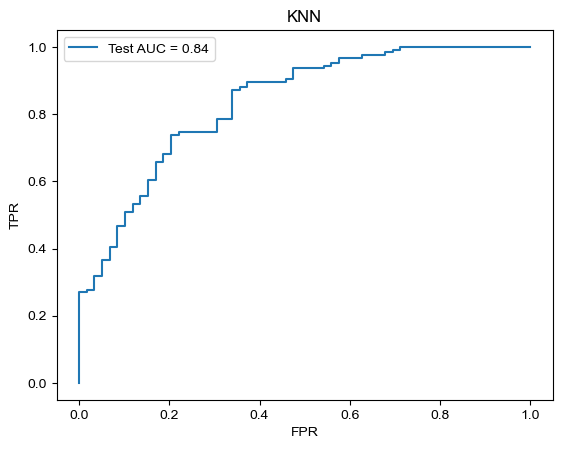

In [20]:
y_score = rand_knn.best_estimator_.predict_proba(X_test)
auc_knn = roc_auc_score(y_test,y_score[:,1])
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,y_score[:,1])
## ROC曲线

plt.plot(fpr_knn,tpr_knn,label = 'Test AUC = %0.2f' % auc_knn)


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('KNN')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('PolynomialFeatures', PolynomialFeatures()),
    ('LR', LogisticRegression())
    
])
params_lr = {
    'LR__C': [0.0001,0.001,0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100,1000],
    'LR__penalty': ['l2','l1'],
    'LR__solver': ['liblinear'],
    'LR__max_iter':[10000],
    'PolynomialFeatures__degree': [i for i in range(1, 3)]
}
# grid_lr = GridSearchCV(
#     estimator=pipeline_lr,
#     param_grid=params_lr,
#     n_jobs = -1,
#     cv = 10
# )

# grid_lr.fit(X_train,y_train)
rand_lr = RandomizedSearchCV(
    estimator=pipeline_lr,
    param_distributions = params_lr,
    n_jobs=-1,
    cv = 10
)
rand_lr.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('PolynomialFeatures',
                                              PolynomialFeatures()),
                                             ('LR', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'LR__C': [0.0001, 0.001, 0.01, 0.1, 2,
                                                  3, 5, 10, 15, 20, 25, 30, 40,
                                                  50, 60, 70, 80, 90, 100,
                                                  1000],
                                        'LR__max_iter': [10000],
                                        'LR__penalty': ['l2', 'l1'],
                                        'LR__solver': ['liblinear'],
                                        'PolynomialFeatures__degree': [1, 2]})

In [20]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
pipeline_svc = Pipeline([
    ('PolynomialFeatures', PolynomialFeatures()),
    ('SVC', SVC(probability=True))
    
])
params_svm = {
    'SVC__C': [0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100],
    'SVC__gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'SVC__kernel': ['rbf'],
#     'SVC__probability':['True'],
    'PolynomialFeatures__degree': [i for i in range(1, 3)]
}
# grid_svm = GridSearchCV(
#     estimator=pipeline_svc,
#     param_grid=params_svm,
#     n_jobs = -1,
#     cv = 10
# )
# grid_svm.fit(X_train,y_train)
rand_svm = RandomizedSearchCV(
    estimator=pipeline_svc,
    param_distributions = params_svm,
    n_jobs=-1,
    cv = 10
)
rand_svm.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('PolynomialFeatures',
                                              PolynomialFeatures()),
                                             ('SVC', SVC(probability=True))]),
                   n_jobs=-1,
                   param_distributions={'PolynomialFeatures__degree': [1, 2],
                                        'SVC__C': [0.01, 0.1, 2, 3, 5, 10, 15,
                                                   20, 25, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                                        'SVC__gamma': [1e-05, 0.0001, 0.001,
                                                       0.1, 1, 10, 100, 1000],
                                        'SVC__kernel': ['rbf']})

In [ ]:


y_predict = grid_svm.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
print(grid_svm.best_estimator_)
print(cm)

print(accuracy_score(y_test,y_predict))

print(precision_score(y_test,y_predict))

print(recall_score(y_test,y_predict))

print(f1_score(y_test,y_predict))

Pipeline(steps=[('PolynomialFeatures', PolynomialFeatures()),
                ('SVC', SVC(C=2, gamma=0.1, probability=True))])
[[ 25  34]
 [ 10 116]]
0.7621621621621621
0.7733333333333333
0.9206349206349206
0.8405797101449275


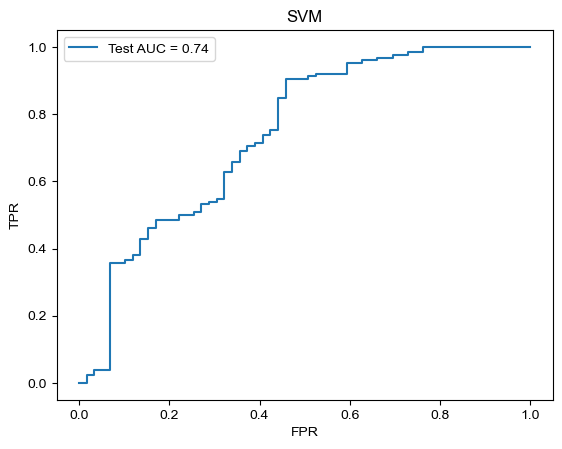

In [ ]:
y_score = grid_svm.best_estimator_.predict_proba(X_test)
auc_knn = roc_auc_score(y_test,y_score[:,1])
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,y_score[:,1])
## ROC曲线

plt.plot(fpr_knn,tpr_knn,label = 'Test AUC = %0.2f' % auc_knn)


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('SVM')
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_dt = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=params_dt,
#     n_jobs = -1,
#     cv = 10
# )
# grid_dt.fit(X_train,y_train)
rand_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions = params_dt,
    n_jobs=-1,
    cv = 10
)
rand_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9]})

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

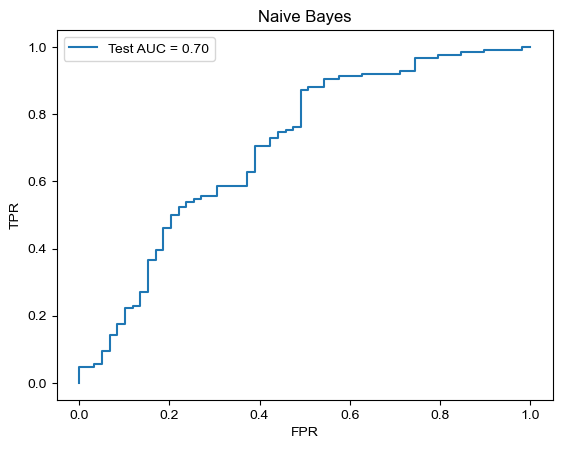

In [ ]:
y_score = gnb.predict_proba(X_test)
auc_gnb = roc_auc_score(y_test,y_score[:,1])
fpr_gnb,tpr_gnb,thres_gnb = roc_curve(y_test,y_score[:,1])
## ROC曲线
# matplotlib.rc("font",family='Songti SC')
plt.plot(fpr_gnb,tpr_gnb,label = 'Test AUC = %0.2f' % auc_gnb)


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Naive Bayes')
plt.legend()
plt.show()

In [23]:
from sklearn.ensemble import VotingClassifier
clf = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(probability=True)
]
vclf = VotingClassifier(
    estimators = [
        ('knn', clf[0]),
        ('lr', clf[1]),
        ('dt', clf[2]),
        ('svm',clf[3])
    ],
    voting = 'soft'
)
params = {
    'knn__n_neighbors' : [n for n in range(1,50)],
    'knn__weights' : ['uniform', 'distance'],
    'knn__p': [i for i in range(1,7)],
    'lr__C': [0.0001,0.001,0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100,1000],
    'lr__penalty': ['l2','l1'],
    'lr__solver': ['liblinear'],
    'lr__max_iter':[10000],
    'lr__multi_class':['multinomial','ovr'],
    'svm__C': [0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100],
    'svm__gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'svm__kernel': ['rbf'],
    'dt__max_depth': [i for i in range(3,10)],
    'dt__min_samples_split' : [i for i in range(3,10)],
    'dt__min_samples_leaf': [i for i in range(3,10)],
    'dt__criterion':['gini', 'entropy', 'log_loss']
    }
from sklearn.model_selection import RandomizedSearchCV 
 
random_cv = RandomizedSearchCV( 
    vclf, params, n_iter=1000, cv=10, scoring="neg_log_loss", n_jobs=-1
)

random_cv.fit(X_train,y_train)

/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as pr

RandomizedSearchCV(cv=10,
                   estimator=VotingClassifier(estimators=[('knn',
                                                           KNeighborsClassifier()),
                                                          ('lr',
                                                           LogisticRegression()),
                                                          ('dt',
                                                           DecisionTreeClassifier()),
                                                          ('svm',
                                                           SVC(probability=True))],
                                              voting='soft'),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'dt__min_samples_leaf': [3, 4,...
                                        'lr__C': [0.0001, 0.001, 0.01, 0.1, 2,
                                                  3, 5, 10, 15, 20, 25, 30, 40,
                                                  50, 60, 70, 80, 90, 100,
                                                  1000],
                                        'lr__max_iter': [10000],
                                        'lr__multi_class': ['multinomial',
                                                            'ovr'],
                                        'lr__penalty': ['l2', 'l1'],
                                        'lr__solver': ['liblinear'],
                                        'svm__C': [0.01, 0.1, 2, 3, 5, 10, 15,
                                                   20, 25, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                                        'svm__gamma': [1e-05, 0.0001, 0.001,
                                                       0.1, 1, 10, 100, 1000],
                                        'svm__kernel': ['rbf']},
                   scoring='neg_log_loss')

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_rf = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 3
# )
# grid_rf.fit(X_train,y_train)
rand_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=params_rf,
    n_jobs = -1,
    cv = 3
)
rand_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=321),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [40, 50, 60, 70, 80, 90,
                                                        100, 120, 140],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 125, 150, 175,
                                                         200, 250]})

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(oob_score=True,random_state=123,bootstrap=True)
params_rf = {
    'n_estimators': [200],
    'max_samples':[1,3,5,7,10,20,30,40,50,60,70,80,90,100,120],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_et = GridSearchCV(
#     estimator=et_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_et.fit(X_train,y_train)
rand_et = RandomizedSearchCV(
    estimator=et_clf,
    param_distributions = params_rf,
    n_jobs=-1,
    cv = 10
)
rand_et.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=ExtraTreesClassifier(bootstrap=True,
                                                  oob_score=True,
                                                  random_state=123),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [1, 3, 5, 7, 10, 20, 30,
                                                        40, 50, 60, 70, 80, 90,
                                                        100, 120],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [200]})

In [26]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(
    n_estimators = 200,
    bootstrap=True,
    oob_score=True,
    bootstrap_features=True,
    random_state=123
)
params_bagging = {
    'estimator':[DecisionTreeClassifier(),SVC(probability=True),LogisticRegression(),KNeighborsClassifier()],
    'max_features':[i for i in range(1,10)],
    'max_samples':[1,3,5,7,10,20,30,40,50,60,70,80,90,100,120],
#     'max_depth': [i for i in range(3,10)],
#     'min_samples_split' : [i for i in range(3,10)],
#     'min_samples_leaf': [i for i in range(3,10)],
#     'criterion':['gini', 'entropy', 'log_loss']
}
# random_bagging = GridSearchCV( 
#     bagging, params_bagging,  cv=10,  n_jobs=16 
# )

# random_bagging.fit(X_train,y_train)
random_bagging = RandomizedSearchCV( 
    bagging, params_bagging,  cv=10,  n_jobs=16 
)

random_bagging.fit(X_train,y_train)

/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/base.py", lin

RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(bootstrap_features=True,
                                               n_estimators=200, oob_score=True,
                                               random_state=123),
                   n_jobs=16,
                   param_distributions={'estimator': [DecisionTreeClassifier(),
                                                      SVC(probability=True),
                                                      LogisticRegression(),
                                                      KNeighborsClassifier()],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'max_samples': [1, 3, 5, 7, 10, 20, 30,
                                                        40, 50, 60, 70, 80, 90,
                                                        100, 120]})

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=200
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=200)

In [ ]:
y_decition = ada_clf.predict_proba(X_test)
auc_log = roc_auc_score(y_test,y_decition[:,1])
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_decition[:,1])
## ROC曲线
plt.plot(fpr_log,tpr_log,label = 'AUC = %0.2f' % auc_log)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("AdaBoost")
plt.legend()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(2,10)],
        'min_samples_split' : [i for i in range(2,10)],
        'min_samples_leaf': [i for i in range(2,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
    # grid_rf = GridSearchCV(
    #     estimator=rf_clf,
    #     param_grid=params_rf,
    #     n_jobs = -1,
    #     cv = 3
    # )
    # grid_rf.fit(X_train,y_train)
    rand_rf = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=params_rf,
        n_jobs = -1,
        cv = 10
    )
    rand_rf.fit(X_train,y_train)
    y_decition_rf = rand_rf.best_estimator_.predict_proba(X_test)
    auc_rf = roc_auc_score(y_test,y_decition_rf[:,1])
    if(auc_rf<0.80):
        rf()
    else:
        print('Random Forest AUC = %0.2f' % auc_rf)
rf()

Random Forest AUC = 0.80


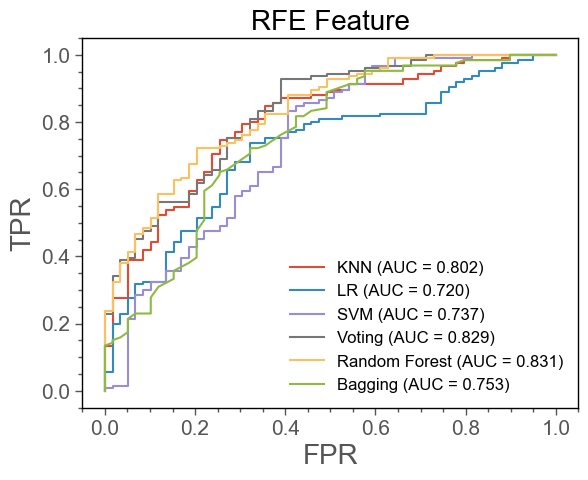

In [31]:
fig, ax = plt.subplots()
bwith = 1
ax = plt.gca()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.style.use("ggplot")
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=15)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=15)

y_score_knn = rand_rf.best_estimator_.predict_proba(X_test)
auc_knn = roc_auc_score(y_test,y_score_knn[:,1])
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,y_score_knn[:,1])
plt.plot(fpr_knn,tpr_knn,label = 'KNN (AUC = %0.3f)' % auc_knn)

y_decition_lr = rand_lr.best_estimator_.decision_function(X_test)
auc_log = roc_auc_score(y_test,y_decition_lr)
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_decition_lr)
plt.plot(fpr_log,tpr_log,label = 'LR (AUC = %0.3f)' % auc_log)

y_decition_svm = rand_svm.best_estimator_.decision_function(X_test)
auc_svm = roc_auc_score(y_test,y_decition_svm)
fpr_svm,tpr_svm,thres_svm = roc_curve(y_test,y_decition_svm)
plt.plot(fpr_svm,tpr_svm,label = 'SVM (AUC = %0.3f)' % auc_svm)

y_decition_vo = random_cv.best_estimator_.predict_proba(X_test)
auc_vo = roc_auc_score(y_test,y_decition_vo[:,1])
fpr_vo,tpr_vo,thres_vo = roc_curve(y_test,y_decition_vo[:,1])
## ROC曲线
plt.plot(fpr_vo,tpr_vo,label = 'Voting (AUC = %0.3f)' % auc_vo)
                                      
y_decition_rf = rand_knn.best_estimator_.predict_proba(X_test)
auc_rf = roc_auc_score(y_test,y_decition_rf[:,1])
fpr_rf,tpr_rf,thres_rf = roc_curve(y_test,y_decition_rf[:,1])
plt.plot(fpr_rf,tpr_rf,label = 'Random Forest (AUC = %0.3f)' % auc_rf)
                                      
# y_decition_et = grid_et.best_estimator_.predict_proba(X_test)
# auc_et = roc_auc_score(y_test,y_decition_et[:,1])
# fpr_et,tpr_et,thres_et = roc_curve(y_test,y_decition_et[:,1])
# plt.plot(fpr_et,tpr_et,label = 'Extra Forest AUC = %0.2f' % auc_et)

y_decition_bagging = random_bagging.best_estimator_.predict_proba(X_test)
auc_bagging = roc_auc_score(y_test,y_decition_bagging[:,1])
fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y_test,y_decition_bagging[:,1])
plt.plot(fpr_bagging,tpr_bagging,label = 'Bagging (AUC = %0.3f)' % auc_bagging)
# fig.patch.set_alpha(0.)                        
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.legend(frameon=False,fontsize=12)
plt.title('RFE Feature',fontsize=20)
plt.savefig('RFE.svg',dpi=1000)
plt.show()

In [38]:
import joblib
joblib.dump(random_cv.best_estimator_, 'saved_model/rfe_voting.pkl')

['saved_model/rfe_voting.pkl']

In [81]:
X_all = standard_scaler.transform(X)
y_decition = random_cv.best_estimator_.predict_proba(X_all)

In [82]:
y_1 = pd.DataFrame(y_decition)
out = pd.concat([y_1,df['Name']],axis=1)

In [84]:
out.to_csv('./RFE_out.csv')

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict =  grid_rf.best_estimator_.predict(X_test)
# cm = confusion_matrix(y_train,y_predict)
# print(cm)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.7351351351351352
0.7483870967741936
0.9206349206349206
0.8256227758007118


In [92]:
a =  grid_rf.best_estimator_.predict_proba(X_test)
a = pd.DataFrame(a)
a.to_excel('./RFE_res.xlsx')

In [135]:
test_

,CFV,LES-IRP,IBP,PC,RE-L-Ac,RE-L-Wa,RE-L-Al,RE-L-Ak,RE-M-Ac,RE-M-Wa,RE-M-Al,RE-M-Ak,RE-T-Ak
a,3.13,2.2,9.4,8.0,17.0,18.0,2.0,37.0,5.0,3.0,0.0,8.0,45.0
b,1.37,-4.6,12.5,10.0,1.0,0.0,0.0,1.0,45.0,11.0,2.0,58.0,59.0


In [141]:
test_ = pd.read_excel('./test.xlsx',index_col=0)
test_= test_.T
test_ = test_.loc[:,col]
X_a =  standard_scaler.transform(test_)
ans = grid_rf.best_estimator_.predict_proba(X_a)

In [142]:
ans

array([[0.55293651, 0.44706349],
       [0.19637566, 0.80362434]])